Ref 


https://www.datacamp.com/tutorial/variational-autoencoders

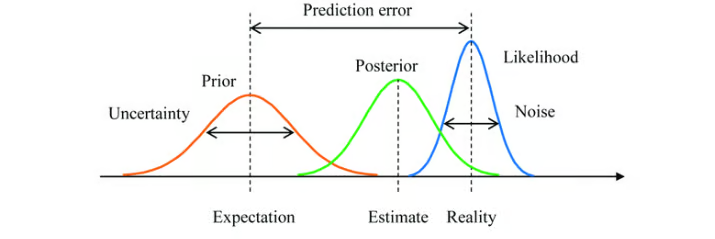

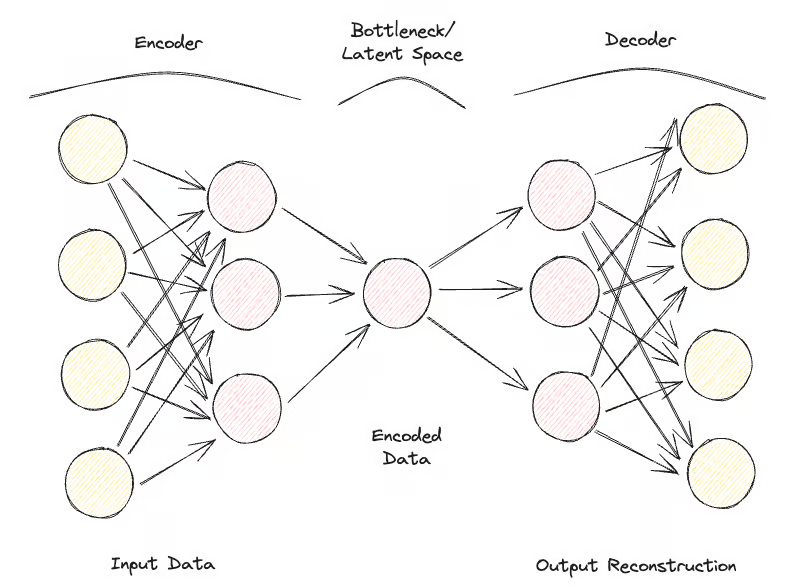

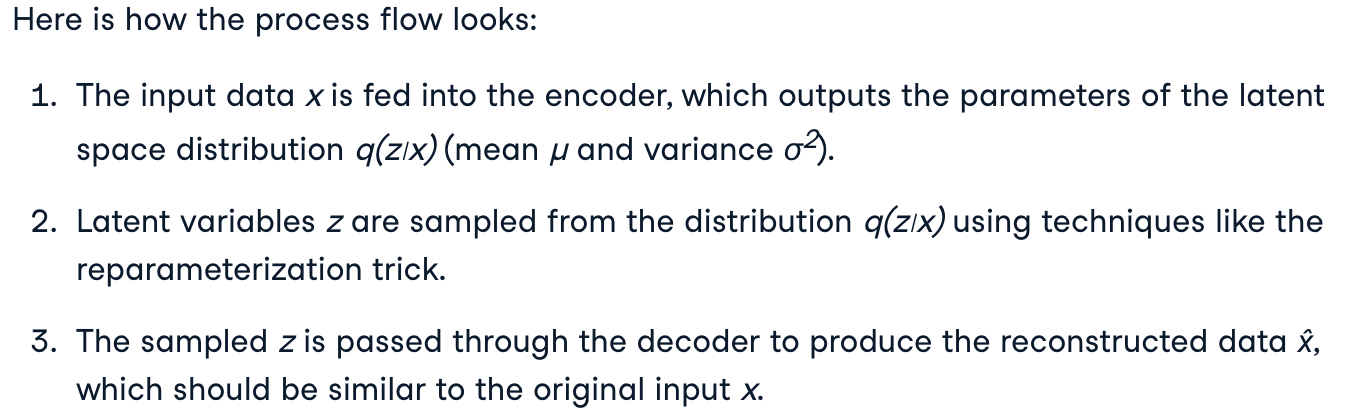

In [2]:
import torch 
import torch.nn as nn 
import torch.optim as optim 
from torchvision import datasets, transforms 
from torch.utils.data import DataLoader 
import matplotlib.pyplot as plt 
import numpy as np

In [4]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)
        
    def forward(self, x):
        h = torch.relu(self.fc1(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar
class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, z):
        h = torch.relu(self.fc1(z))
        x_hat = torch.sigmoid(self.fc2(h))
        return x_hat
class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)
        
    def forward(self, x):
        mu, logvar = self.encoder(x)
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        x_hat = self.decoder(z)
        return x_hat, mu, logvar

In [ ]:
# We also have to define the loss function. 
# The loss function for VAEs consists of a reconstruction loss and 
# a KL divergence loss. This is how it looks in PyTorch: 


In [6]:
def loss_function(x, x_hat, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [7]:
# To train the VAE, we will load the MNIST dataset, define the optimizer, and train the model.
# Hyperparameters
input_dim = 784
hidden_dim = 400
latent_dim = 20
lr = 1e-3
batch_size = 128
epochs = 10
# Data loader
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# Model, optimizer
vae = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=lr)
# Training loop
vae.train()
for epoch in range(epochs):
    train_loss = 0
    for x, _ in train_loader:
        x = x.view(-1, input_dim)
        optimizer.zero_grad()
        x_hat, mu, logvar = vae(x)
        loss = loss_function(x, x_hat, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    
    print(f"Epoch {epoch + 1}, Loss: {train_loss / len(train_loader.dataset)}")

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████| 9.91M/9.91M [00:00<00:00, 35.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|███████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 940kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 8.56MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 1.13MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1, Loss: 163.9483923502604
Epoch 2, Loss: 121.36913984375
Epoch 3, Loss: 114.36787008463541
Epoch 4, Loss: 111.32546891276041
Epoch 5, Loss: 109.54683243815104
Epoch 6, Loss: 108.38744978841146
Epoch 7, Loss: 107.54001599934895
Epoch 8, Loss: 106.95635935872396
Epoch 9, Loss: 106.3820157063802
Epoch 10, Loss: 105.97953374023437


3. Testing and evaluating the model


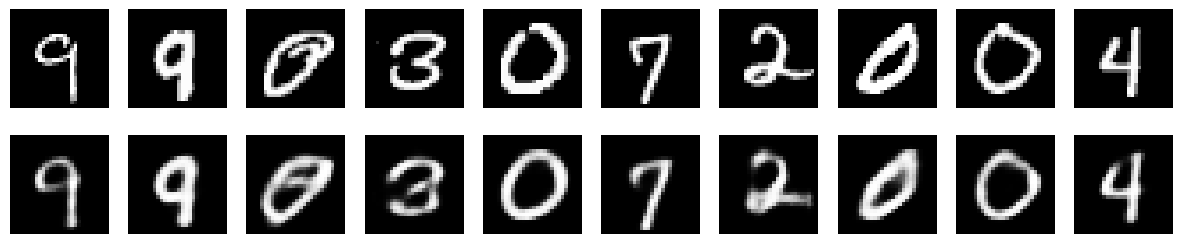

In [9]:
# visualizing reconstructed outputs
vae.eval()
with torch.no_grad():
    x, _ = next(iter(train_loader))
    x = x.view(-1, input_dim)
    x_hat, _, _ = vae(x)
    x = x.view(-1, 28, 28)
    x_hat = x_hat.view(-1, 28, 28)
    
    fig, axs = plt.subplots(2, 10, figsize=(15, 3))
    for i in range(10):
        axs[0, i].imshow(x[i].cpu().numpy(), cmap='gray')
        axs[1, i].imshow(x_hat[i].cpu().numpy(), cmap='gray')
        axs[0, i].axis('off')
        axs[1, i].axis('off')
    plt.show()


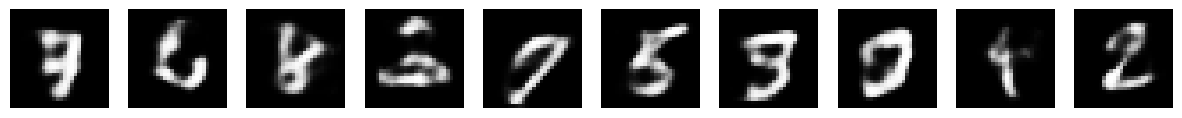

In [10]:
#visualizing generated samples
with torch.no_grad():
    z = torch.randn(10, latent_dim)
    sample = vae.decoder(z)
    sample = sample.view(-1, 28, 28)
    
    fig, axs = plt.subplots(1, 10, figsize=(15, 3))
    for i in range(10):
        axs[i].imshow(sample[i].cpu().numpy(), cmap='gray')
        axs[i].axis('off')
    plt.show()